# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

# Problem Statement:

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

E-news express wants to analyze whether user responses more on new landing page as compared to old landing page or there user's response is same on both old and new landing page. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.

# Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language?
Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [ ]:
# import libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# import libraries to help with Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# import libraries to help with statisticalanalysis
import scipy.stats as stats

## Reading the Data into a DataFrame

In [ ]:
# mount google drive for colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python course/abtest.csv')


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
#viewing first 5 rows of the data
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
#viewing last 5 rows of the data
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
# Checking the shape of Dataset
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 100 rows and 6 columns


In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


 Observations:

Total columns: 6
Thera are two numerical and 4 catergorical column in dataset.

In [ ]:
# use describe() to see a numerical statistical summary of the data
df.describe(include="all")

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


Onservations:

1. The average time spend on the page is 5.37 minutes
2. Minimum time spend on the page is 0.19 minutes
3. Maximum time spend on the page is 10.71 minutes
4. There are 2 unique values in group and "Control" being the top in group with frequency of 50.
5. There are 3 unique languages in language preferred, "Spanish" being the top language.

In [ ]:
# checking the missing values of data
df.isnull().sum().sum()

0

Observations:

There are no missing values in the dataframe.

In [ ]:
# checking duplicates
df.duplicated().sum()

0

Observations:

There are no duplicated values in the dataframe.

### Univariate Analysis

# User ID

In [ ]:
# Checking unique user ID
df['user_id'].nunique()

100

Observation:

There are 100 unique User ID in Dataset.

# Group

In [ ]:
# Checking unique group
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

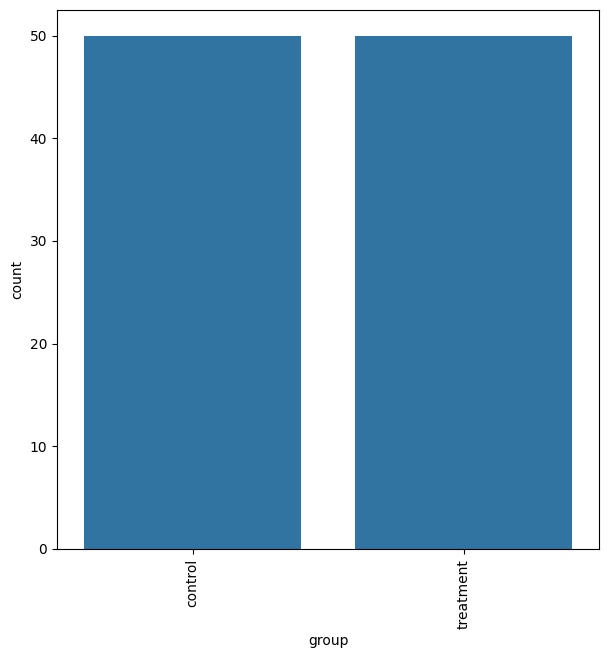

In [ ]:
# visual analysis of both the group counts
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="group")
plt.xticks(rotation=90)
plt.show()

Observaions:

There are two groups; Control with 50 counts and Treatment with 50 counts.

# Landing page

In [ ]:
# Checking unique landing_page
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

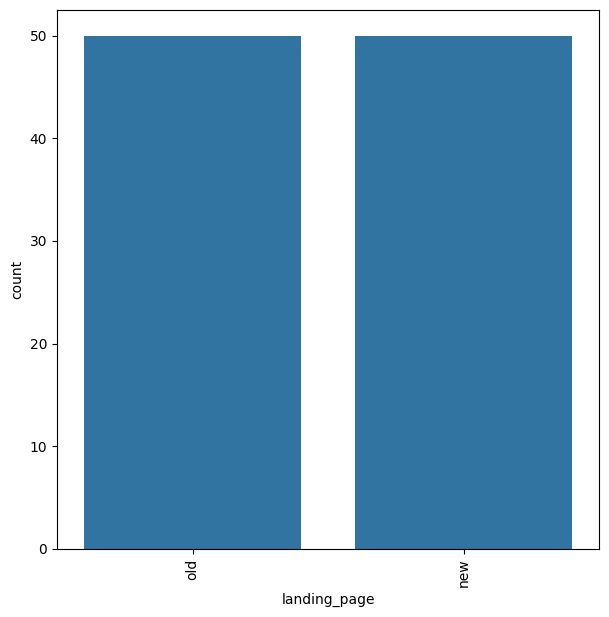

In [ ]:
# countplot to check number of counts on old and new landing page
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="landing_page")
plt.xticks(rotation=90)
plt.show()

Observations:

There are two kind of landing page one is "Old" with 50 counts and another is "New" with 50 counts as well.

# Time spent on the page

In [ ]:
# Checking unique Time spent on the page
df['time_spent_on_the_page'].nunique()

94

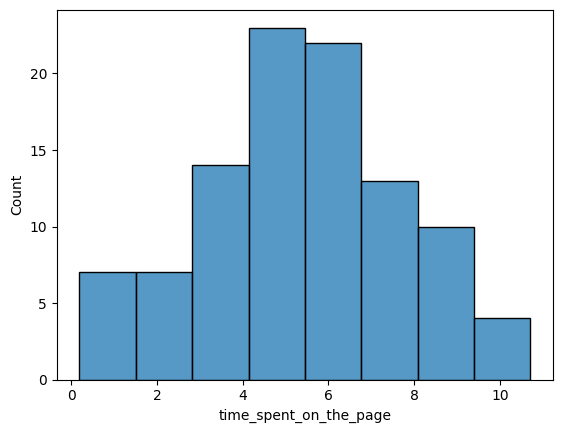

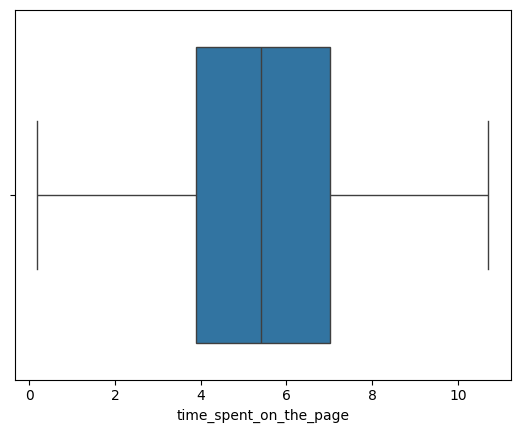

In [ ]:
# histplot to check count of time spent on the page
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

Onservations:

* The time spent on the page seems to be a normally distributed
* There are no outliers


# Converted

In [ ]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

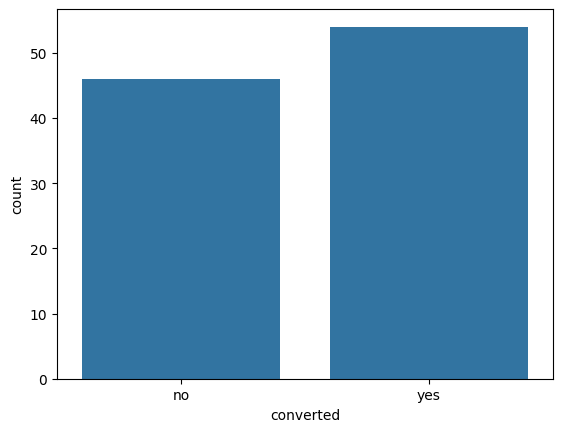

In [ ]:
# countplot for converted
sns.countplot(data=df,x="converted")
plt.show()

Observations:

* There are 54 users converted and 46 users are with not converted status

# Language preferred


In [ ]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

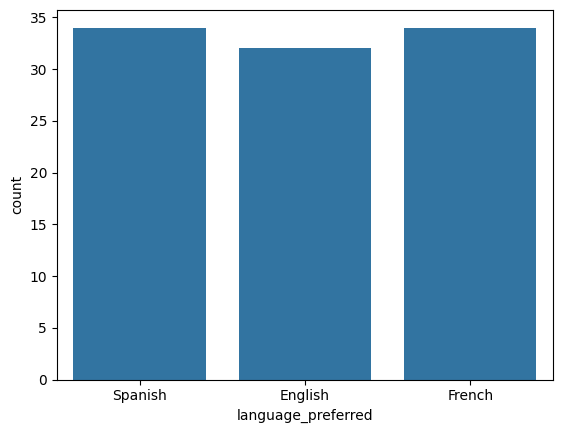

In [ ]:
# countplot for language preferred
sns.countplot(data=df,x='language_preferred')
plt.show()

Observations:

* As we can see that Spanish and French are the most preferred languages with 34 counts and english with 32 counts.

### Bivariate Analysis

# Landing page vs Time spent on the page

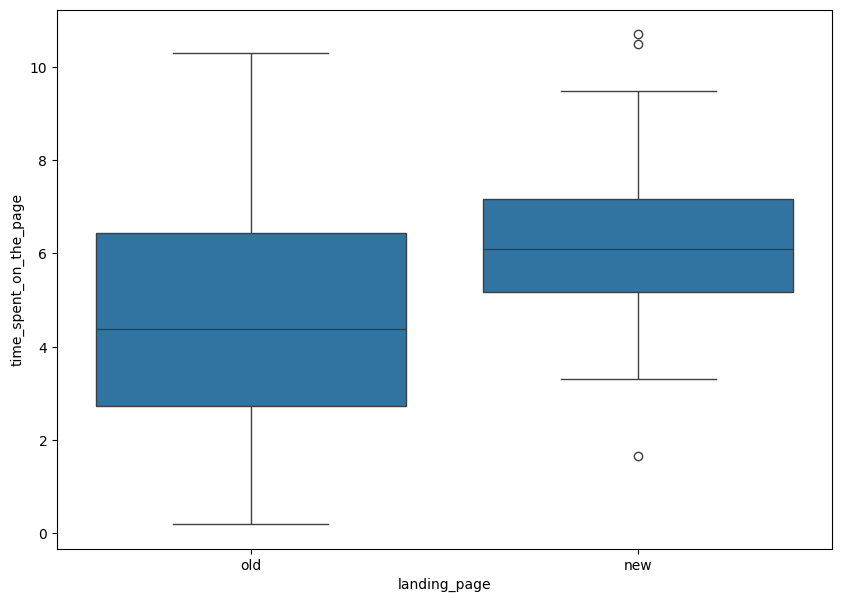

In [ ]:
# visual analysis to check relation between landing page and time spent on the page
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

Observations:

* We can see that users spent more time on new landing page as compared to old landing page.
* Also, we can see few outliers on new landing page.

# Language preferred vs Time spent on the page


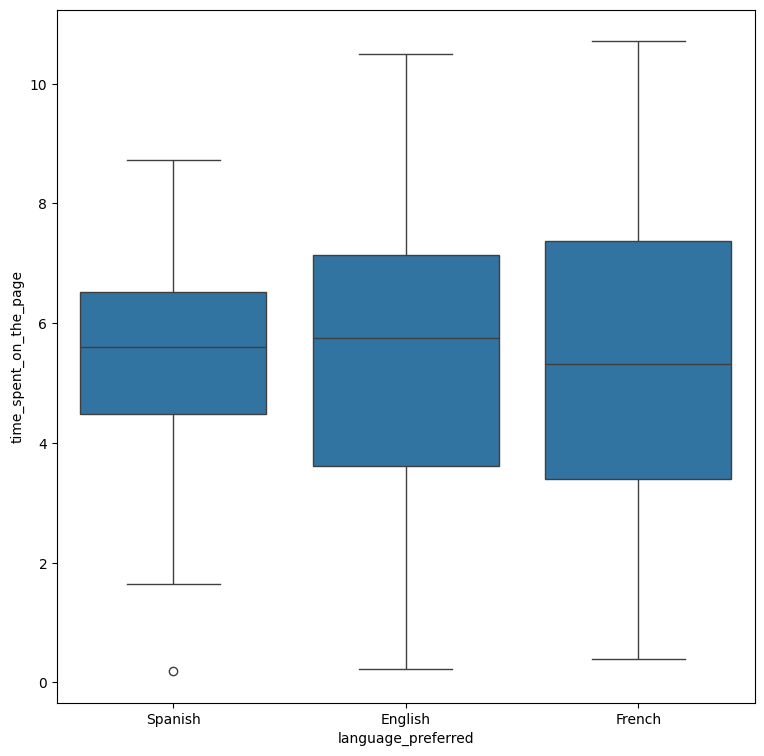

In [ ]:
# visual analysis  to understand the relationship between 'time_spent_on_the_page' and 'language_preferred'
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x ="language_preferred", y ="time_spent_on_the_page")
plt.show()

Observations:

* Spanish and French with little or no skewness, whereas English with right skew.
* French has larger quartile range where spanish being the shortest one.

# Conversion status vs Time spent on the page

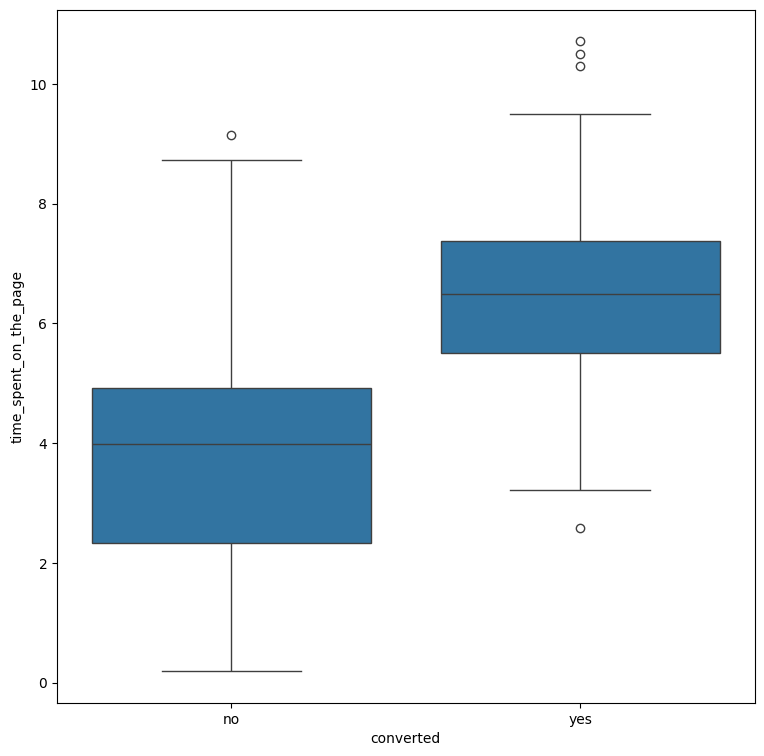

In [ ]:
# visual analysis  to understand the relationship between 'time_spent_on_the_page' and 'converted'
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x ="converted", y ="time_spent_on_the_page")
plt.show()

Observations:

* As we can see that users with positive conversion status has clearly spent more time on the page than the users which are with negative converted status.

# 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

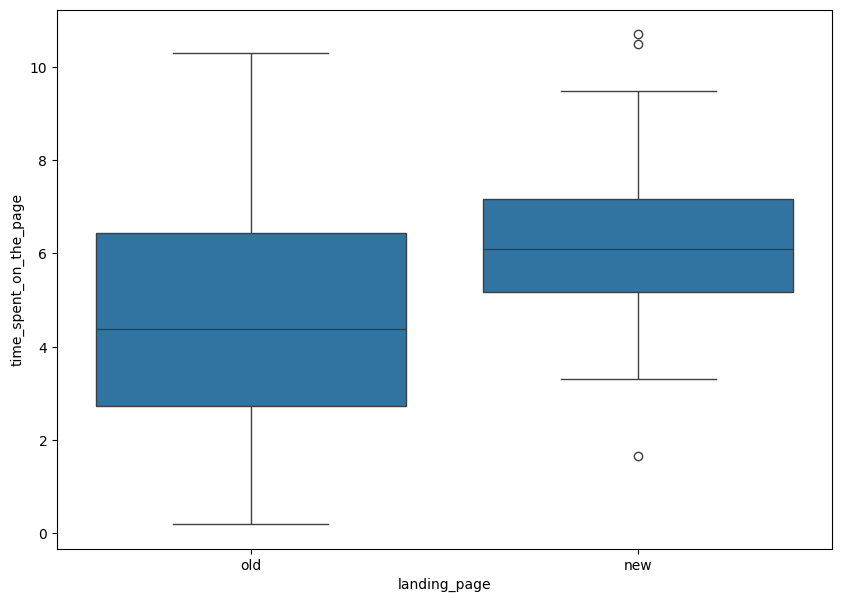

In [ ]:
# visual analysis of the comparision between new landing page and old landing page
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x="landing_page",y='time_spent_on_the_page')
plt.show()

Observations:

As we can see that users with positive conversion status has clearly spent more time on the page than the users which are with negative converted status.

### Step 1: Define the null and alternate hypotheses

H0: The average time spent by User on old landing page is equal to new landing page.

Ha: The average time spent by user on new landing page is more than the old landing page.


### Step 2: Select Appropriate test

It is  a one tailed test as two population means are drawn from two population and standard deviations are unknown so two- sample t test would be appropriate.

### Step 3: Decide the significance level

As given in the problem statement, level of significance a = 0.05

### Step 4: Collect and prepare data

In [ ]:
# Extract dataframe for new landing page
time_on_new_landing_page =df[df["landing_page"]=="new"]["time_spent_on_the_page"]
# Extract dataframe for old landing page
time_on_old_landing_page =df[df["landing_page"]=="old"]["time_spent_on_the_page"]
print("The standard deviation of the time spent on new landing page is ", str(round(time_on_new_landing_page.std(),2)))
print("The standard deviation of the time spent on old landing page is ", str(round(time_on_old_landing_page.std(),2)))

The standard deviation of the time spent on new landing page is  1.82
The standard deviation of the time spent on old landing page is  2.58


Assumptions:
* Continuous data - Yes, the time spent on the page is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.


### Step 5: Calculate the p-value

In [ ]:
# import function to perform ttest
from scipy.stats import ttest_ind
ttest,p_value =ttest_ind(time_on_new_landing_page,time_on_old_landing_page, equal_var= False,alternative = "greater")
print("The p_value is", p_value)

The p_value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# comparing the p-value with level of significance
if p_value < 0.05:
  print("The p_value is less than level of significance, we reject the null hypothesis.")
else:
  print("The p_value is greater than level of significance, we fail to reject the null hypothesis.")

The p_value is less than level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As we tested and it resulted into the p_value being smaller than the level of significance, we reject the null hypothesis. So from this we can infer that the mean time spent by users on new landing page is greater than old landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

# Visual Analysis

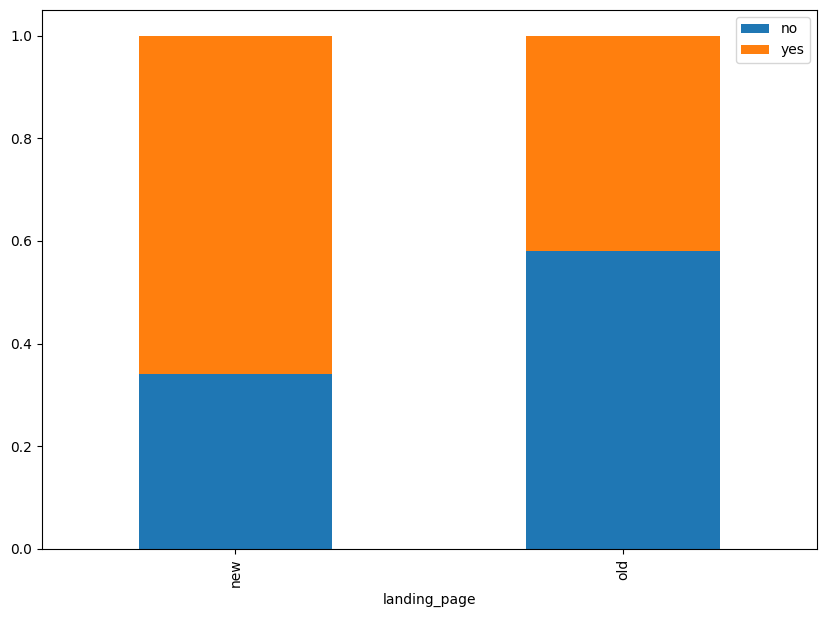

In [ ]:
# visual analysis of conversion rate of both new and old landing page
pd.crosstab(df['landing_page'],df['converted'],normalize="index").plot(kind="bar",figsize=(10,7),stacked= True)
plt.legend()
plt.show()

In [ ]:
matrix = pd.crosstab(df['landing_page'],df['converted'])
matrix

converted,no,yes
landing_page,,
new,17,33
old,29,21


# Observation:

we can see that user landing on new page has more coversion ratio rather than old landing page.

### Step 1: Define the null and alternate hypotheses







H0: The conersion rate of new landing page is equal to an old landing page

Ha: The conversion rate of new landing page is greater than old landing page

### Step 2: Select Appropriate test

It is a one tailed test as two population proportions are dawn from two individual populations and as per the information given, so here in this case two- proportion z-test would be appropriate.

### Step 3: Decide the significance level

As given in the problem statement, we select level of significate(alpha) a= 0.05

Step 4: Collect and prepare data

In [ ]:
# count of converted in treatment group
new_converted = df[df["group"]=="treatment"]["converted"].value_counts()["yes"]
# count of converted in control group
old_converted = df[df["group"]=="control"]["converted"].value_counts()["yes"]
# total number of users in the control group
n_control = df.group.value_counts()['control']
# total number of users in the treatment group
n_treatment = df.group.value_counts()['treatment']

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))


The numbers of users served the new and old pages are 50 and 50 respectively


# Step 5: Calculate the p-value

In [ ]:
# importing necessary function
from statsmodels.stats.proportion import proportions_ztest

# calculating p_value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ="larger")
print('The p-value is ', p_value)

The p-value is  0.008026308204056278


# Step 6: Compare the p-value with level of significance(alpha a)


In [ ]:
#comparing p_value with levl of significance

if p_value < 0.05:
  print("The p_value is less than level of significance, we reject the null hypothesis.")
else:
  print("The p_value is greater than level of significance, we fail to reject the null hypothesis")

The p_value is less than level of significance, we reject the null hypothesis.


# Step 7: Draw inference

As we tested and it resulted into the p_value being smaller than the level of significance, we reject the null hypothesis. So from this we can infer that the conversion rate of users landing on new page is greater than the old page.

## 3. Is the conversion and preferred language are independent or related?

# Visual Analysis

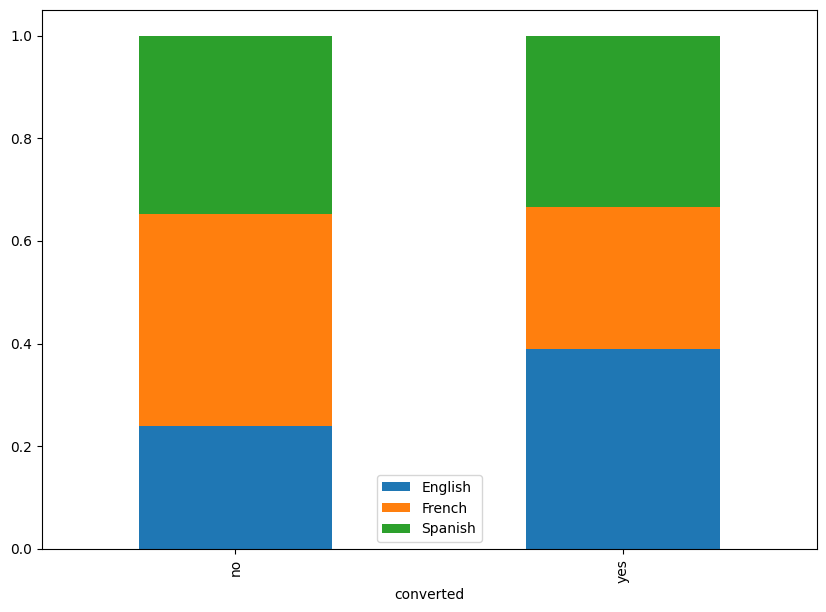

In [ ]:
# visual analysis of conversion on based of preffered language
pd.crosstab(df["converted"],df["language_preferred"],normalize='index').plot(kind="bar", figsize=(10,7), stacked=True)
plt.legend()
plt.show()

In [ ]:
contigency_table1 = pd.crosstab(df['language_preferred'],df['converted'])
contigency_table1

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


Observations:

* English language users conversion rate is higher than French and Spanish users.

# Step 1: Define the null and alternate hypotheses


H0: The converted status is independent of preferred language.

Ha: The converted staus is dependent on preferred language.


# Step 2: Select Appropriate test

As this is related to the test of independence of categorical variables;converted status and preferred language. It would be appropriate to use chi square test of independence.

# Step 3: Decide the significance level


As given in the problem statement, we select α = 0.05.





# Step 4: Collect and prepare data

In [ ]:
contigency_table1 = pd.crosstab(df['language_preferred'],df['converted'])
contigency_table1

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


# Step 5: Calculate the p-value

In [ ]:
# import the required function
from scipy.stats import chi2_contingency
chi, p_value, dof, expected = chi2_contingency(contigency_table1)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


# Step 6: Compare the p-value with α

In [ ]:
#comparing p_value with level of significance

if p_value < 0.05:
  print("The p_value is less than level of significance, we reject the null hypothesis.")
else:
  print("The p_value is greater than level of significance, we fail to reject the null hypothesis")

The p_value is greater than level of significance, we fail to reject the null hypothesis


# Step 7: Draw inference

As we can see that p_value is larger than the level of significance, we fail to reject the null hypothesis. So from this we can infer that the conversion status is independent of language preferred.

## 4. Is the time spent on the new page same for the different language users?

# Visual Analysis

In [ ]:
new_df = df[df['landing_page']=="new"]
new_df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


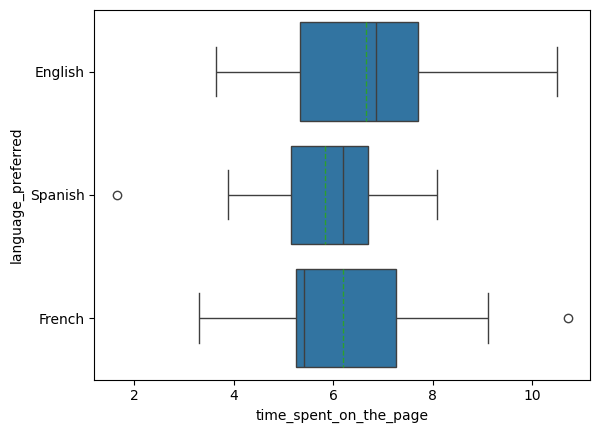

In [ ]:
# visually analysis of new landing page based on  preffered language
sns.boxplot(data= new_df, x="time_spent_on_the_page", y="language_preferred",showmeans =True,meanline=True)
plt.show()

In [ ]:
# the mean time spent on the new page for different language users
new_df.groupby(["language_preferred"])["time_spent_on_the_page"].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

Observations:

* The mean time spent on the page by French, Spanish and English users are as follows:

English    6.663750

French     6.196471

Spanish    5.835294

# Step 1: Define the null and alternate hypotheses


H0: mu_1 = mu_2 = mu_3

Ha: At least one mean time spent on new page is different from the rest.

# Step 2: Select Appropriate test

As there are 3 population means, a one way-analysis of variance test would be most appropriate here.

# Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.


# Step 4: Collect and prepare data

In [ ]:
# forming data frame of the time spent on the new page by English, French and spanish language users individually
time_spent_English = new_df[new_df['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = new_df[new_df['language_preferred']=="Spanish"]['time_spent_on_the_page']
time_spent_Spanish = new_df[new_df['language_preferred']=="French"]['time_spent_on_the_page']

# Step 5: Calculate the p-value

In [ ]:
# calculating p_value
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)

print('The p-value is', p_value)

The p-value is 0.43204138694325955


# Step 6: Compare the p-value with α

In [ ]:
#comparing p_value with levl of significance

if p_value < 0.05:
  print("The p_value is less than level of significance, we reject the null hypothesis.")
else:
  print("The p_value is greater than level of significance, we fail to reject the null hypothesis")

The p_value is greater than level of significance, we fail to reject the null hypothesis


# Step 7: Draw inference

As we can see that p_value is larger than the level of significance, we fail to reject the null hypothesis. So from this we can infer that the mean time spent on new page by all the different language users is equal.

## Conclusion and Business Recommendations

## Conclusions:

* By using two sample independent t=test, we can say that the average time spent by users on new landing page is greater than old landing page. As the p_value (0.0001) is less than level of significance, we rejected the null hypothesis.

* By using two- proportion z-test, we can conclude that the conversion rate of users landing on new page is greater than the old page. As the p_value (0.0008) is less than level of significance, we rejected the null hypothesis.

* By using chi-square test of independence,we can conclude that conversion status is independent of language preferred.As the p_value (0.213) is greater than level of significance, we fail to reject the null hypothesis.

* By using Anova test, we can conclude that the mean time spent on new page by all the different language users is equal.As the p_value (0.432) is greater than level of significance, we fail to reject the null hypothesis.



## Recommendations:

* Users spent more time on new landing page so E-news express should keep implementing new landing page or updating the old landing page in order to increase the traffic.

* As we have witnessed that conversion rate has increased by implementing  new landing page which indicates that E-news should make landing page more engaging and user friendly.

* As conversion rate and languages preferred by user is independent of each other so E-news express should try adding more diverse language preference. As it might can draw more attention from the diverse group of people and leads to increase in traffic and conversion rate.




___